In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from scipy.stats import skew

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [7]:
test.date_time.unique().tolist()[:20]

['2012-11-05 21:28:38',
 '2013-06-05 17:56:22',
 '2013-03-21 21:59:35',
 '2012-11-29 14:37:14',
 '2013-06-17 12:48:47',
 '2013-04-03 18:35:08',
 '2013-02-21 22:06:07',
 '2013-05-31 11:31:01',
 '2012-11-12 22:01:19',
 '2013-03-16 14:31:14',
 '2013-04-28 19:26:01',
 '2013-06-01 07:28:37',
 '2013-06-16 12:13:40',
 '2013-06-10 08:34:07',
 '2013-02-28 22:39:17',
 '2013-06-01 11:17:21',
 '2013-04-30 12:19:43',
 '2013-02-24 11:27:16',
 '2013-01-09 11:16:34',
 '2013-06-10 09:12:10']

In [8]:
train.date_time.unique().tolist()[:20]

['2013-04-04 08:32:15',
 '2012-12-31 08:59:22',
 '2013-06-05 12:27:51',
 '2013-03-20 17:50:44',
 '2013-02-25 08:39:33',
 '2013-03-15 14:55:16',
 '2012-11-05 19:52:18',
 '2013-02-18 17:16:25',
 '2012-12-11 13:03:42',
 '2012-11-26 10:13:17',
 '2013-02-26 19:42:22',
 '2013-02-11 01:28:38',
 '2013-05-28 22:05:02',
 '2013-04-03 08:54:17',
 '2013-04-06 18:08:58',
 '2012-12-26 11:38:48',
 '2012-12-19 14:24:00',
 '2013-01-09 16:45:45',
 '2013-03-19 15:57:46',
 '2013-05-18 09:25:08']

In [124]:
# random sample training dataset (5000 records)
train_small = train.sample(5000, replace=True)
train_small = train_small.reset_index().drop(columns = ['index'])  #reset_index for clean view
train_small.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,279392,2012-12-17 13:40:24,9,59,NaN,NaN,59,97445,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,89197,2013-05-27 02:42:49,5,219,NaN,NaN,117,12687,5,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,416303,2013-03-18 07:28:35,5,219,NaN,NaN,219,82231,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,584352,2013-04-10 07:20:28,5,219,NaN,NaN,219,31450,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
4,356831,2013-06-19 07:12:51,5,219,NaN,NaN,219,24724,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [125]:
# random sample training dataset (1000 records)
test_small = test.sample(1000, replace=True)
test_small = test_small.reset_index().drop(columns = ['index']) # reset_index
test_small.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,81036,2013-04-22 14:20:53,5,219,NaN,NaN,219,56371,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,352210,2013-03-18 08:46:51,5,219,NaN,NaN,219,248,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,127166,2013-03-18 17:26:20,24,219,NaN,NaN,219,131892,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,652005,2013-01-26 16:41:25,5,219,NaN,NaN,219,125083,4,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,626332,2012-12-04 15:16:30,14,100,3.17,128.12,219,47237,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# make the id feature as object -> how to transform a list of features as different types

train_small.info()
obj_feats = ['srch_id','site_id','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id','srch_saturday_night_bool', 'random_bool','click_bool','booking_bool']
train_small[obj_feats] = train_small[obj_feats].astype(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 54 columns):
srch_id                        5000 non-null int64
date_time                      5000 non-null object
site_id                        5000 non-null int64
visitor_location_country_id    5000 non-null int64
visitor_hist_starrating        237 non-null float64
visitor_hist_adr_usd           238 non-null float64
prop_country_id                5000 non-null int64
prop_id                        5000 non-null int64
prop_starrating                5000 non-null int64
prop_review_score              4994 non-null float64
prop_brand_bool                5000 non-null int64
prop_location_score1           5000 non-null float64
prop_location_score2           3900 non-null float64
prop_log_historical_price      5000 non-null float64
position                       5000 non-null int64
price_usd                      5000 non-null float64
promotion_flag                 5000 non-null int64
srch_destinat

Text(0.5, 1.0, 'log(price+1)')

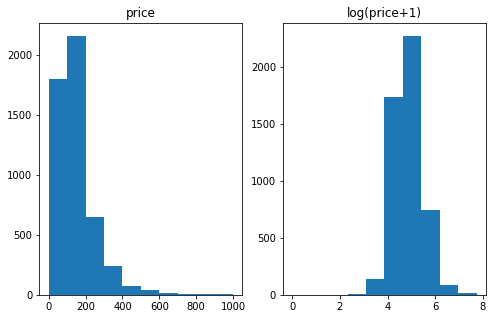

In [57]:
# check the skewdness of the data "price"
fig, subaxes = plt.subplots(1, 2, figsize=(8, 5))
subaxes[0].hist(train_small['price_usd'].values, range=(0,1000))  # highly left-skewed
subaxes[0].set_title('price')
subaxes[1].hist(np.log1p(train_small["price_usd"])) 
subaxes[1].set_title('log(price+1)')

<h4> log transform the skewed data

In [189]:
# log transform the target:
train_small["price_usd"] = np.log1p(train_small["price_usd"])

# log transform skewed numeric features:
numeric_feats = train_small.dtypes[train_small.dtypes != "object"].index
skewed_feats = train_small[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
print('skewed_feats:{}'.format(skewed_feats))
skewed_feats = skewed_feats.index
train_small[skewed_feats] = np.log1p(train_small[skewed_feats])
train_small.head()

skewed_feats:site_id                     1.464460
visitor_hist_adr_usd        1.805466
prop_location_score2        1.773768
promotion_flag              1.401957
srch_length_of_stay         1.011632
srch_children_count         1.568603
srch_room_count             4.264748
random_bool                 0.895878
comp1_inv                  31.575323
comp1_rate_percent_diff    25.771743
comp2_inv                   6.647667
comp2_rate_percent_diff     1.129920
comp3_inv                   6.715517
comp3_rate_percent_diff     1.219941
comp4_inv                  11.657450
comp4_rate_percent_diff    10.980069
comp5_inv                   5.392911
comp5_rate_percent_diff     1.609261
comp6_inv                  16.576531
comp6_rate_percent_diff     4.648553
comp7_inv                  13.497800
comp8_rate_percent_diff     0.949481
click_bool                  4.529754
gross_bookings_usd          2.252604
booking_bool                6.007393
dtype: float64


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,279392,2012-12-17 13:40:24,2.302585,59,3.408397,1.801782,59,97445,4,4.0,...,1.245109,0.152542,0.0,2.640161,-0.05848,0.002559,1.257277,0.0,1.869534,0.0
1,89197,2013-05-27 02:42:49,1.791759,219,3.408397,1.801782,117,12687,5,5.0,...,1.245109,0.152542,0.0,2.640161,-0.05848,0.002559,1.257277,0.0,1.869534,0.0
2,416303,2013-03-18 07:28:35,1.791759,219,3.408397,1.801782,219,82231,3,4.5,...,1.245109,0.152542,0.0,2.640161,0.00000,0.000000,1.257277,0.0,1.869534,0.0
3,584352,2013-04-10 07:20:28,1.791759,219,3.408397,1.801782,219,31450,3,4.5,...,1.245109,0.152542,0.0,2.640161,0.00000,0.000000,1.257277,0.0,1.869534,0.0
4,356831,2013-06-19 07:12:51,1.791759,219,3.408397,1.801782,219,24724,4,4.5,...,1.245109,0.152542,0.0,2.640161,0.00000,0.000000,1.257277,0.0,1.869534,0.0


For normally distributed data, the skewness should be about 0. For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html)

In [59]:
# handle boolean values
# bol_feats = ['random_bool','click_bool','booking_bool']
# pd.get_dummies(train_small[bol_feats])

# train_small = pd.concat([train_small, pd.get_dummies(train_small[bol_feats])], axis=1)
# train_small.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,random_bool_0,random_bool_1,click_bool_0,click_bool_1,booking_bool_0,booking_bool_1
7378267,495825,2013-06-13 19:05:49,24,216,NaN,NaN,81,37306,3,0.0,...,NaN,0,NaN,0,1,0,1,0,1,0
5023826,337058,2013-04-23 17:27:49,15,55,4.0,5.497988,219,125488,3,4.0,...,NaN,0,NaN,0,1,0,1,0,1,0
2304846,154764,2012-11-06 05:39:16,5,219,NaN,NaN,219,102528,3,3.5,...,NaN,0,NaN,0,0,1,1,0,1,0
7525026,505698,2013-04-07 19:50:08,15,55,NaN,NaN,215,118196,4,3.0,...,NaN,0,NaN,0,0,1,1,0,1,0
7715903,518448,2013-03-16 17:25:06,5,219,NaN,NaN,100,95519,3,4.0,...,NaN,0,NaN,0,1,0,1,0,1,0


In [163]:
# filling NA's with the mean of the column 
train_small = train_small.fillna(train_small.mean())

train_small = train_small.replace(np.inf,0)  # replace inf with 0
train_small = train_small.replace(-np.inf,0)

train_small.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,279392,2012-12-17 13:40:24,9,59,3.408397,5.06044,59,97445,4,4.0,...,2.473314,0.152542,0.0,2.640161,-0.05848,0.002559,2.515835,0,5.485271,0
1,89197,2013-05-27 02:42:49,5,219,3.408397,5.06044,117,12687,5,5.0,...,2.473314,0.152542,0.0,2.640161,-0.05848,0.002559,2.515835,0,5.485271,0
2,416303,2013-03-18 07:28:35,5,219,3.408397,5.06044,219,82231,3,4.5,...,2.473314,0.152542,0.0,2.640161,0.00000,0.000000,2.515835,0,5.485271,0
3,584352,2013-04-10 07:20:28,5,219,3.408397,5.06044,219,31450,3,4.5,...,2.473314,0.152542,0.0,2.640161,0.00000,0.000000,2.515835,0,5.485271,0
4,356831,2013-06-19 07:12:51,5,219,3.408397,5.06044,219,24724,4,4.5,...,2.473314,0.152542,0.0,2.640161,0.00000,0.000000,2.515835,0,5.485271,0


In [164]:
# data processing for test data （同process training data方法）

obj_feats = ['srch_id','site_id','visitor_location_country_id','prop_country_id','prop_id','srch_destination_id','srch_saturday_night_bool', 'random_bool']
test_small[obj_feats] = test_small[obj_feats].astype(object)

# log transform the target:
test_small["price_usd"] = np.log1p(test_small["price_usd"])

# log transform skewed numeric features:
skewed_feats = [feat for feat in skewed_feats if feat != 'gross_bookings_usd'] #  test data没有'gross_bookings_usd'
test_small[skewed_feats] = np.log1p(test_small[skewed_feats])
test_small.head()

# handle boolean values
# bol_feats = ['random_bool']
# pd.get_dummies(test_small[bol_feats])

# test_small = pd.concat([test_small, pd.get_dummies(test_small[bol_feats])], axis=1)
# test_small.head()

# filling NA's with the mean of the column 
test_small = test_small.fillna(test_small.mean())
test_small = test_small.replace(np.inf,0)
test_small = test_small.replace(-np.inf,0)
test_small.head()


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,81036,2013-04-22 14:20:53,5,219,3.499787,0.304761,219,56371,3,4.5,...,0.28328,0.096154,0.034943,0.283421,0.2,0.034943,0.28649,-0.072386,0.012755,0.280922
1,352210,2013-03-18 08:46:51,5,219,3.499787,0.304761,219,248,3,3.5,...,0.28328,0.096154,0.034943,0.283421,0.2,0.034943,0.28649,-0.072386,0.012755,0.280922
2,127166,2013-03-18 17:26:20,24,219,3.499787,0.304761,219,131892,4,4.0,...,0.28328,0.096154,0.034943,0.283421,0.2,0.034943,0.28649,0.000000,0.000000,0.280922
3,652005,2013-01-26 16:41:25,5,219,3.499787,0.304761,219,125083,4,4.5,...,0.28328,0.096154,0.034943,0.283421,0.2,0.034943,0.28649,0.000000,0.000000,0.280922
4,626332,2012-12-04 15:16:30,14,100,3.170000,0.303982,219,47237,3,3.5,...,0.28328,0.096154,0.034943,0.283421,0.2,0.034943,0.28649,-0.072386,0.012755,0.280922


<h3> Modeling 

In [180]:
# creating matrices for sklearn:
# handle object columns:

remove_feats = ['price_usd','date_time','srch_id','site_id','visitor_location_country_id','prop_country_id','prop_id','prop_brand_bool','srch_destination_id','srch_saturday_night_bool','random_bool','click_bool','booking_bool', 'random_bool','click_bool','booking_bool']

X_train = train_small[[col for col in train_small.columns.unique().tolist() if col not in remove_feats ]]
X_test = test_small[[col for col in test_small.columns.unique().tolist() if col not in remove_feats ]]
y = train_small.price_usd

In [181]:
X_train.head()
X_test.head()
y.head()

0    4.824306
1    5.241747
2    4.394449
3    4.867534
4    4.787492
Name: price_usd, dtype: float64

In [182]:
# TODO: check na and inf values
print(np.any(np.isnan(X_train)))
print(np.all(np.isfinite(X_train)))

print(np.any(np.isnan(X_test)))
print(np.all(np.isfinite(X_test)))  # 有infinite values

print(np.any(np.isnan(y)))
print(np.all(np.isfinite(y)))   # 有infinite values

False
True
False
True
False
True


In [183]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train_.values, y.values, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [184]:
# Ridge regression
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

/anaconda3/envs/si699/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [185]:
# Lasso
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train.values, y.values)

/anaconda3/envs/si699/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [186]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 36 variables and eliminated the other 5 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

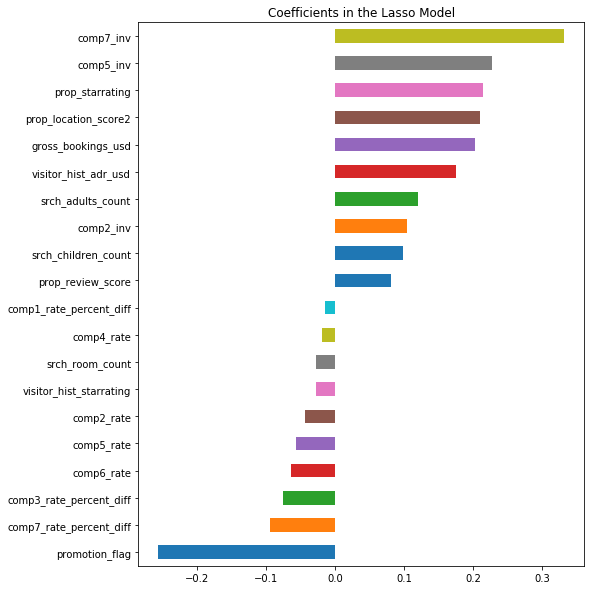

In [187]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

the most important features are comp7_inv, comp5_inv, prop_starrating, prop_location_score2, gross_bookings_usd, visitor_hist_adr_usd

Competitor 7 and 5's availability(comp7_inv, comp5_inv) have the most impact on Expedia's list prices, followed by the star rating of the hotel(prop_starrating). Other factors that seem to have much influence on listed hotel price on Expedia is the location of the hotel (prop_location_score2). Total value of transaction, which is different from price_usd due to taxes,fees, conventions and multiple day bookings, etc., also has effect on listed price. Moreover, Visitors' historical purchase amount -- the mean price per night (in USD) of the hotels the customer has previously purchased (visitor_hist_adr_usd) would also influence the listed price of a hotel.

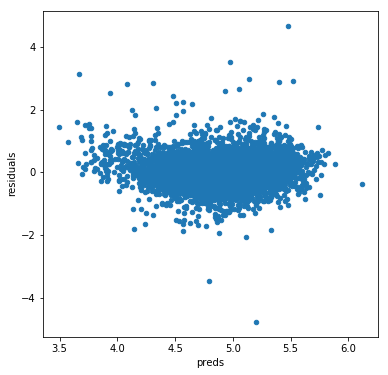

In [188]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

the residual plot looks pretty good  --> ready for prediction on test set

In [23]:
# 关于user data 
len(train['visitor_hist_starrating'].unique().tolist()) # 326
len(train['visitor_hist_starrating'].unique().tolist()) # 326
len(train['visitor_hist_adr_usd'].unique().tolist()) # 12836

12836

In [5]:
# unique columns
train.columns.unique().tolist()

['srch_id',
 'date_time',
 'site_id',
 'visitor_location_country_id',
 'visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'prop_country_id',
 'prop_id',
 'prop_starrating',
 'prop_review_score',
 'prop_brand_bool',
 'prop_location_score1',
 'prop_location_score2',
 'prop_log_historical_price',
 'position',
 'price_usd',
 'promotion_flag',
 'srch_destination_id',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'srch_saturday_night_bool',
 'srch_query_affinity_score',
 'orig_destination_distance',
 'random_bool',
 'comp1_rate',
 'comp1_inv',
 'comp1_rate_percent_diff',
 'comp2_rate',
 'comp2_inv',
 'comp2_rate_percent_diff',
 'comp3_rate',
 'comp3_inv',
 'comp3_rate_percent_diff',
 'comp4_rate',
 'comp4_inv',
 'comp4_rate_percent_diff',
 'comp5_rate',
 'comp5_inv',
 'comp5_rate_percent_diff',
 'comp6_rate',
 'comp6_inv',
 'comp6_rate_percent_diff',
 'comp7_rate',
 'comp7_inv',
 'comp7_rate_percent_diff',
 'comp8_rate',


<h4> TODO: describe data

In [12]:
# train.info()

In [5]:
# numeric features description
non_numeric_features = ['date_time', 'srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'promotion_flag', 'srch_destination_id', 'random_bool', 'click_bool', 'booking_bool']
train_small_numeric = train_small.drop(columns = non_numeric_features)
train_small_numeric.describe()

,visitor_hist_starrating,visitor_hist_adr_usd,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,...,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,gross_bookings_usd
count,328.000000,328.000000,5000.000000,4992.000000,5000.000000,5000.000000,3766.000000,5000.000000,5000.000000,5000.000000,...,285.000000,309.000000,118.000000,310.000000,376.000000,140.000000,1982.000000,2060.000000,623.000000,136.000000
mean,3.208384,179.015854,3.079000,3.756510,0.633400,2.807464,0.142287,4.497806,16.697200,153.197690,...,0.115789,0.071197,27.194915,0.174194,0.119681,22.614286,-0.076186,0.008252,14.051364,429.725882
std,0.667490,62.477158,1.069854,1.039713,0.481924,1.556018,0.172031,1.631508,10.458957,129.187515,...,0.590950,0.281656,92.436188,0.587335,0.348767,49.315252,0.475283,0.214641,12.496968,583.879615
min,2.300000,74.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.040000,...,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,47.100000
25%,2.500000,122.510000,3.000000,3.500000,0.000000,1.610000,0.019725,4.510000,8.000000,81.610000,...,0.000000,0.000000,8.000000,0.000000,0.000000,7.750000,0.000000,0.000000,7.000000,128.082500
50%,3.260000,180.750000,3.000000,4.000000,1.000000,2.710000,0.076450,4.930000,15.000000,118.000000,...,0.000000,0.000000,13.000000,0.000000,0.000000,12.000000,0.000000,0.000000,11.000000,208.120000
75%,3.740000,229.180000,4.000000,4.500000,1.000000,3.870000,0.197900,5.300000,26.000000,179.000000,...,0.000000,0.000000,21.750000,1.000000,0.000000,24.000000,0.000000,0.000000,17.000000,496.932500
max,5.000000,334.430000,5.000000,5.000000,1.000000,6.930000,0.921400,6.210000,38.000000,3050.000000,...,1.000000,1.000000,985.000000,1.000000,1.000000,527.000000,1.000000,1.000000,153.000000,4491.280000


In [13]:
# train_small_numeric.columns.unique().tolist()

有一些feature的sd值相差很大，提醒在之后train model时候可以进行standardization处理

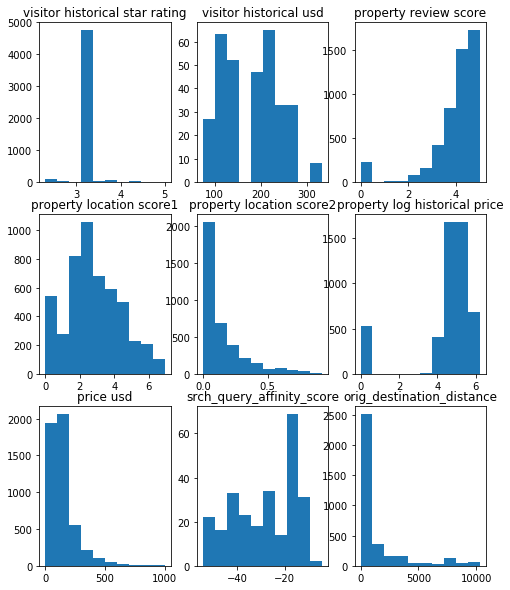

<Figure size 432x288 with 0 Axes>

In [134]:
## plot histogram of continuous numeric features  (manually select possible features)

fig, subaxes = plt.subplots(3, 3, figsize=(8, 10))

subaxes[0,0].hist(train_small_numeric['visitor_hist_starrating'].dropna().values)
subaxes[0,0].set_title('visitor historical star rating')

subaxes[0,1].hist(train_small_numeric['visitor_hist_adr_usd'].dropna().values)
subaxes[0,1].set_title('visitor historical usd')

subaxes[0,2].hist(train_small_numeric['prop_review_score'].dropna().values)
subaxes[0,2].set_title('property review score')

subaxes[1,0].hist(train_small_numeric['prop_location_score1'].dropna().values)
subaxes[1,0].set_title('property location score1')

subaxes[1,1].hist(train_small_numeric['prop_location_score2'].dropna().values)
subaxes[1,1].set_title('property location score2')

subaxes[1,2].hist(train_small_numeric['prop_log_historical_price'].dropna().values)
subaxes[1,2].set_title('property log historical price')

subaxes[2,0].hist(train_small_numeric['price_usd'].dropna().values, range=(0,1000))
subaxes[2,0].set_title('price usd')

subaxes[2,1].hist(train_small_numeric['srch_query_affinity_score'].dropna().values)
subaxes[2,1].set_title('srch_query_affinity_score')

subaxes[2,2].hist(train_small_numeric['orig_destination_distance'].dropna().values)
subaxes[2,2].set_title('orig_destination_distance')

plt.show()
plt.tight_layout()

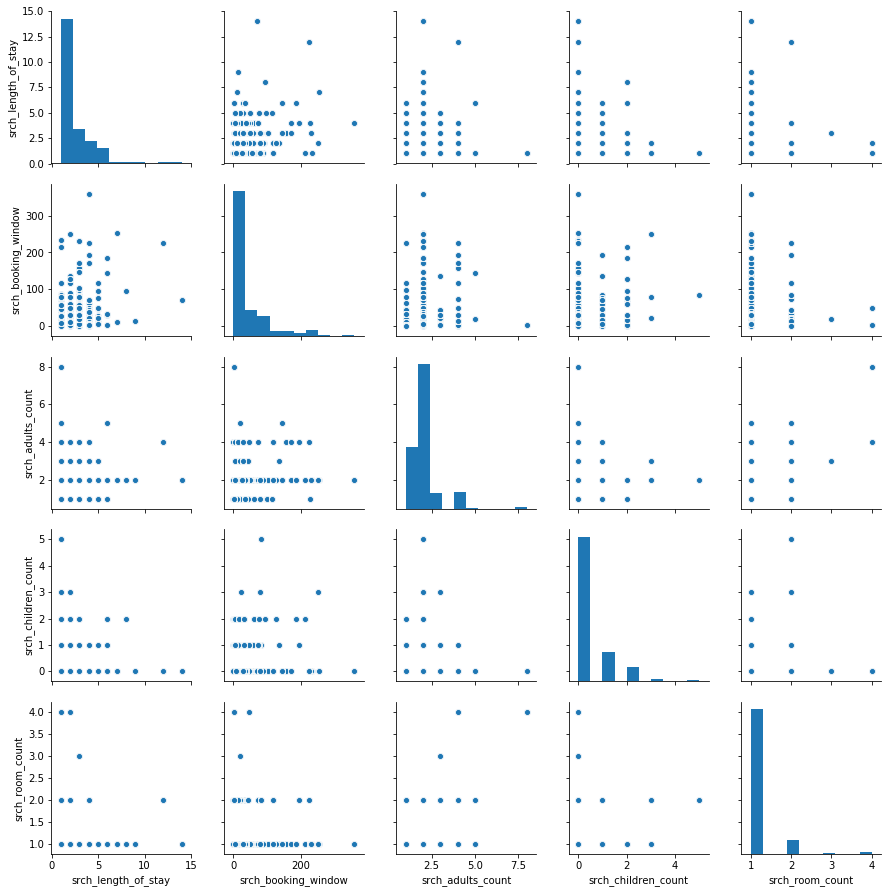

In [143]:
# pairplot (discrete numeric variables)
g = sns.pairplot(train_small, vars=["srch_length_of_stay", "srch_booking_window","srch_adults_count","srch_children_count","srch_room_count"])
g

In [ ]:
# TODO: get pair plot between "price" and other indicative features

<h4> Searching data (discrete variables) vs. price </h4>

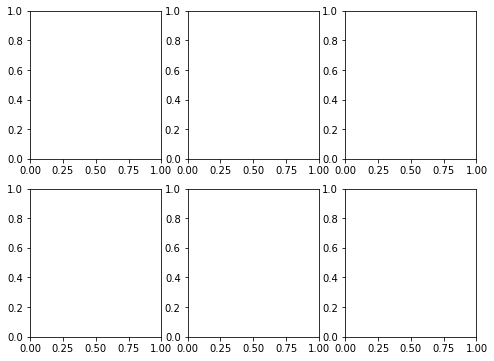

In [53]:
fig, subaxes = plt.subplots(2, 3, figsize=(8, 6))

subaxes[0,0].hist(train_small_numeric['visitor_hist_starrating'].dropna().values)
subaxes[0,0].set_title('visitor historical star rating')


/anaconda3/envs/leetcode/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


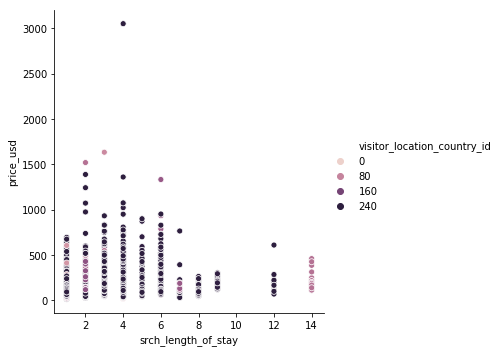

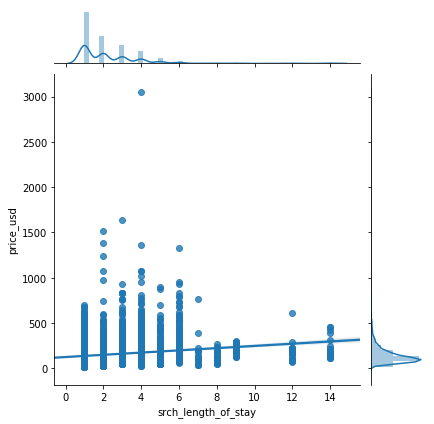

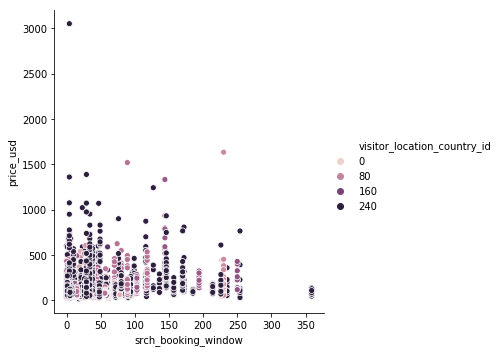

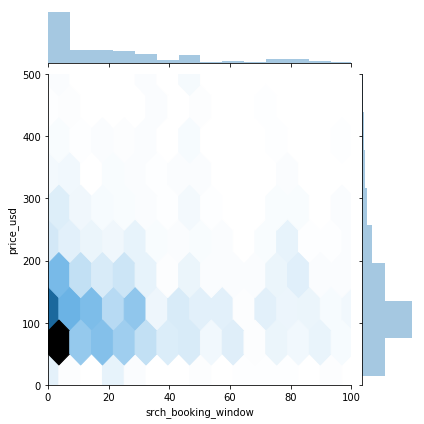

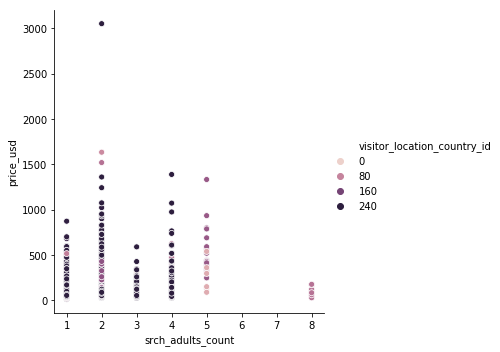

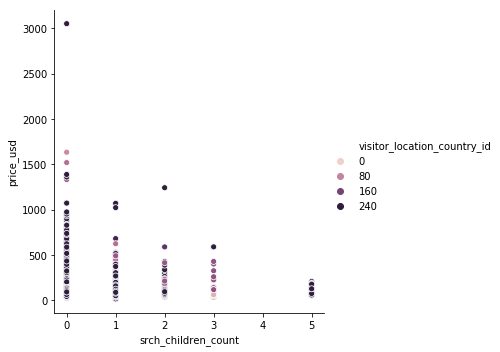

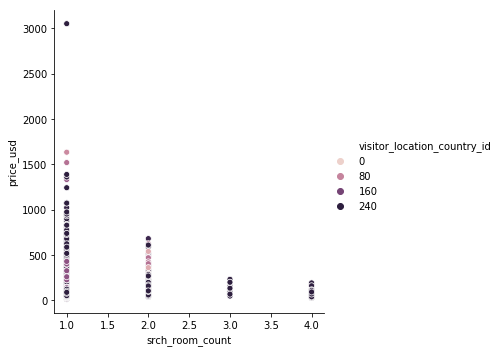

In [59]:
# srch_length_of_stay vs. price
sns.relplot(x="srch_length_of_stay",y="price_usd", hue='visitor_location_country_id', data=train_small)
sns.jointplot("srch_length_of_stay", "price_usd", data=train_small, kind="reg")

# search booking window vs. price usd
sns.relplot(x="srch_booking_window",y="price_usd", hue='visitor_location_country_id', data=train_small)
ax = sns.jointplot("srch_booking_window", "price_usd",data=train_small, kind="hex", xlim = (0,100),ylim=(0,500))

# srch_adults_count vs. price usd
sns.relplot(x="srch_adults_count",y="price_usd", hue='visitor_location_country_id', data=train_small)
# ax = sns.jointplot("srch_adults_count", "price_usd",data=train_small, kind="reg")


# srch_children_count
sns.relplot(x="srch_children_count",y="price_usd", hue='visitor_location_country_id', data=train_small)

# srch_room_count
sns.relplot(x="srch_room_count",y="price_usd", hue='visitor_location_country_id', data=train_small)

/anaconda3/envs/leetcode/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


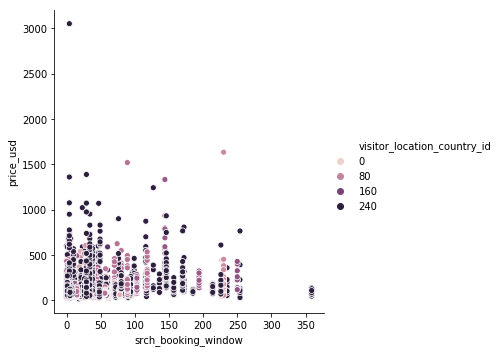

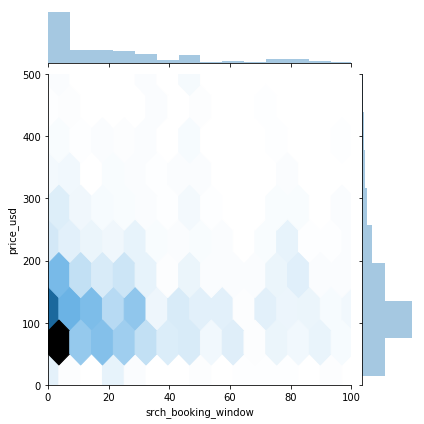

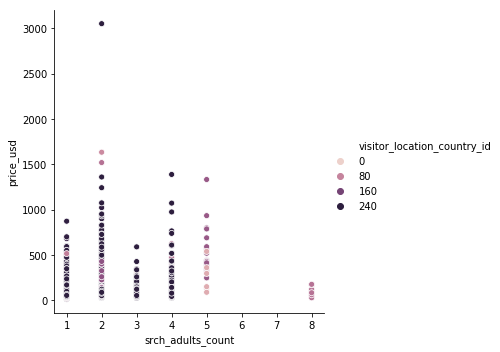

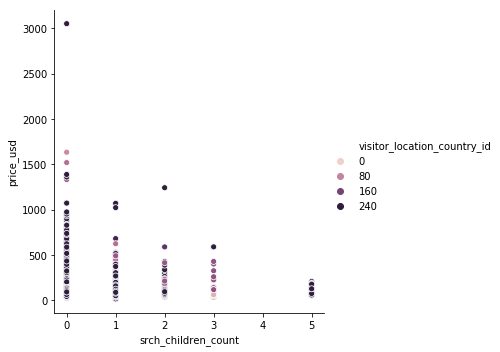

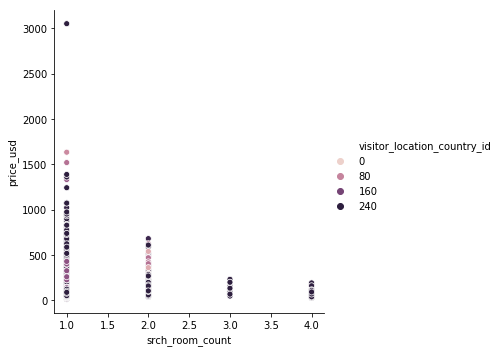

<h4> price vs. continuous variables</h4>

/anaconda3/envs/leetcode/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


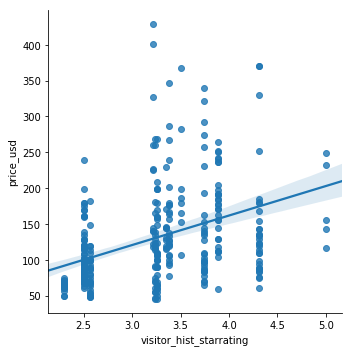

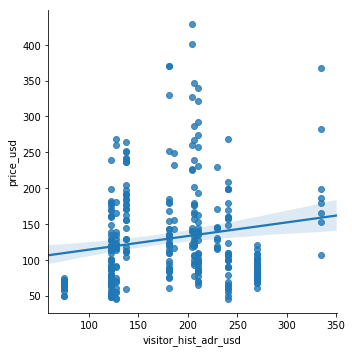

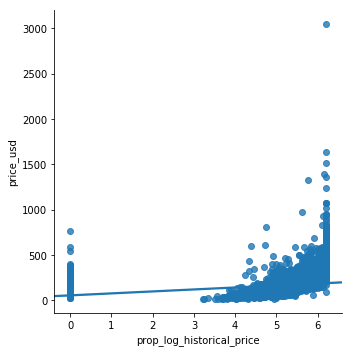

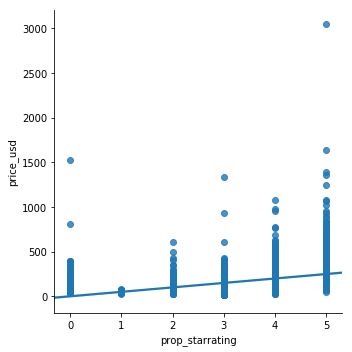

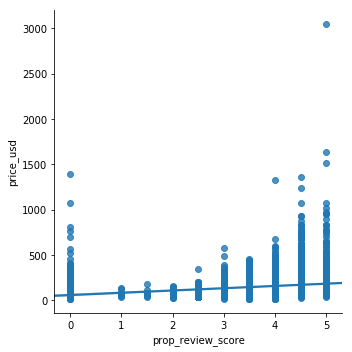

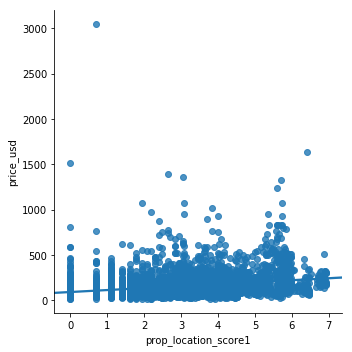

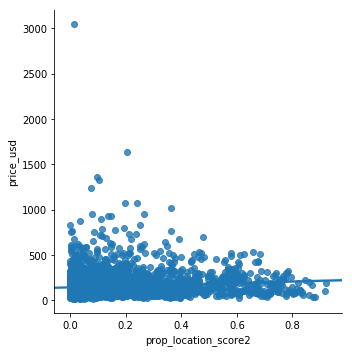

In [56]:
# visitor historical star rating
g = sns.lmplot(x="visitor_hist_starrating", y="price_usd", data=train_small,markers=["o"])

# visitor history usd
g = sns.lmplot(x="visitor_hist_adr_usd", y="price_usd", data=train_small,markers=["o"])

# prop_log_historical_price
g = sns.lmplot(x="prop_log_historical_price", y="price_usd", data=train_small,markers=["o"])

# prop_starrating
g = sns.lmplot(x="prop_starrating", y="price_usd", data=train_small,markers=["o"])

# prop_review_score
g = sns.lmplot(x="prop_review_score", y="price_usd", data=train_small,markers=["o"])

# prop_location_score1
g = sns.lmplot(x="prop_location_score1", y="price_usd", data=train_small,markers=["o"])

# prop_location_score2
g = sns.lmplot(x="prop_location_score2", y="price_usd", data=train_small,markers=["o"])


<h4> convert "date_time" to date_time object in pandas (用途待定）</h4>

In [141]:
# convert "date_time" to date_time object in pandas
train_small['date_time'] =pd.to_datetime(train_small.date_time)
train_small['date_time'].head()

/anaconda3/envs/leetcode/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0   2013-04-04 08:32:15
1   2013-04-04 08:32:15
2   2013-04-04 08:32:15
3   2013-04-04 08:32:15
4   2013-04-04 08:32:15
Name: date_time, dtype: datetime64[ns]

<h3> Part2: Build Model </h3>

In [147]:
train_small['visitor_hist_starrating'] = train_small['visitor_hist_starrating'].replace(np.nan,np.mean(train_small['visitor_hist_starrating']))
train_small.head()

/anaconda3/envs/leetcode/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,3.208384,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,3.208384,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,3.208384,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,3.208384,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,3.208384,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [154]:
train_small.columns.unique().tolist()

['srch_id',
 'date_time',
 'site_id',
 'visitor_location_country_id',
 'visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'prop_country_id',
 'prop_id',
 'prop_starrating',
 'prop_review_score',
 'prop_brand_bool',
 'prop_location_score1',
 'prop_location_score2',
 'prop_log_historical_price',
 'position',
 'price_usd',
 'promotion_flag',
 'srch_destination_id',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'srch_saturday_night_bool',
 'srch_query_affinity_score',
 'orig_destination_distance',
 'random_bool',
 'comp1_rate',
 'comp1_inv',
 'comp1_rate_percent_diff',
 'comp2_rate',
 'comp2_inv',
 'comp2_rate_percent_diff',
 'comp3_rate',
 'comp3_inv',
 'comp3_rate_percent_diff',
 'comp4_rate',
 'comp4_inv',
 'comp4_rate_percent_diff',
 'comp5_rate',
 'comp5_inv',
 'comp5_rate_percent_diff',
 'comp6_rate',
 'comp6_inv',
 'comp6_rate_percent_diff',
 'comp7_rate',
 'comp7_inv',
 'comp7_rate_percent_diff',
 'comp8_rate',


In [152]:
from sklearn.model_selection import train_test_split 

X_small = train_small.drop(columns = ['price_usd','date_time'])
y_small = train_small[['price_usd']]

X_train, X_test, y_train, y_test = train_test_split(X_small,y_small)
X_train.head()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
2289,148,10,4,3.208384,NaN,219,35223,4,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2817,180,5,219,3.208384,NaN,219,98185,3,4.0,1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2411,159,5,219,3.208384,NaN,219,25709,3,3.5,1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
4591,335,32,220,3.208384,NaN,99,42115,0,2.5,0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN,0
2208,145,5,219,3.208384,NaN,219,13552,0,4.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [171]:
## TODO: handle NA values
# check null values in each column
null_dict = {}
for col in train_small.columns.unique().tolist():
    if train_small[col].isnull().sum().sum() != 0:
        null_dict[col] = train_small[col].isnull().sum().sum()
print(null_dict)

null_df = pd.DataFrame(null_dict, index = [0])
null_df.head()

{'visitor_hist_adr_usd': 4672, 'prop_review_score': 8, 'prop_location_score2': 1234, 'srch_query_affinity_score': 4738, 'orig_destination_distance': 1456, 'comp1_rate': 4870, 'comp1_inv': 4856, 'comp1_rate_percent_diff': 4896, 'comp2_rate': 3029, 'comp2_inv': 2942, 'comp2_rate_percent_diff': 4493, 'comp3_rate': 3404, 'comp3_inv': 3289, 'comp3_rate_percent_diff': 4571, 'comp4_rate': 4749, 'comp4_inv': 4717, 'comp4_rate_percent_diff': 4912, 'comp5_rate': 2825, 'comp5_inv': 2720, 'comp5_rate_percent_diff': 4166, 'comp6_rate': 4715, 'comp6_inv': 4691, 'comp6_rate_percent_diff': 4882, 'comp7_rate': 4690, 'comp7_inv': 4624, 'comp7_rate_percent_diff': 4860, 'comp8_rate': 3018, 'comp8_inv': 2940, 'comp8_rate_percent_diff': 4377, 'gross_bookings_usd': 4864}


,visitor_hist_adr_usd,prop_review_score,prop_location_score2,srch_query_affinity_score,orig_destination_distance,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,...,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,gross_bookings_usd
0,4672,8,1234,4738,1456,4870,4856,4896,3029,2942,...,4715,4691,4882,4690,4624,4860,3018,2940,4377,4864


In [155]:
# random forest regressor --> goal: use feature importance to extract informative features
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=10, random_state=0,n_estimators=100)
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [153]:
# linear regression --> error: cannot handle NA value
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_test,y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').